Group Number: 19
Mohamed Ali Talbe/ 300148252
Haytem Hilal/ 300276804

### Introduction  

This notebook is designed as part of Assignment 3: Predictive Analysis (Regression and Classification) for the CSI4142 Fundamentals of Data Science course. The primary objective of this notebook is to explore predictive modeling techniques by analyzing two datasets—one for regression and another for classification. Through this analysis, we will apply data preprocessing, feature engineering, and machine learning models to derive insights and make accurate predictions.  

- Regression task: We will analyze the Laptop Price Prediction Dataset, which includes various laptop specifications such as brand, RAM, storage, processor type, and additional add-ons. Our goal is to predict laptop prices using linear regression techniques and evaluate the impact of different factors on pricing.  
- Classification task: We will explore the Dirty Cafe Sales Dataset, which contains 10,000 sales transactions from a cafe. Since this dataset is intentionally "dirty" with missing values and inconsistencies, we will first clean the data and then build a decision tree classifier to predict a categorical outcome based on transaction details.  

### How to Use This Notebook  

This notebook is structured as follows:  

1. Dataset descriptions  
   - Overview of each dataset, including its source, key features, and intended use.  

2. Data preprocessing and cleaning  
   - Handling missing values, outliers, and categorical variables.  
   - Encoding categorical features using one-hot encoding and other transformation techniques.  

3. Exploratory data analysis (EDA)  
   - Regression: Visualizing data distributions and identifying correlations between features.  
   - Classification: Identifying patterns in cafe sales and detecting data inconsistencies.  
   - Applying Local Outlier Factor (LOF) to detect and handle outliers.  

4. Regression task: Laptop price prediction  
   - Implementing and evaluating a linear regression model.  
   - Comparing results with different configurations (e.g., with/without outlier removal, with/without feature aggregation).  

5. Classification task: Cafe sales analysis  
   - Building a decision tree classifier to categorize transactions.  
   - Experimenting with different hyperparameters, including Gini vs. Entropy, max depth, and split rules.  

6. Feature engineering  
   - Creating additional features to improve model performance in both regression and classification tasks.  

7. Empirical study and model evaluation  
   - Splitting data into train, validation, and test sets.  
   - Performing cross-validation to evaluate different data processing strategies.  
   - Regression: Evaluating models using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score.  
   - Classification: Evaluating models using Accuracy, Precision, Recall, and F1-score.  

8. Conclusion  
   - Summarizing key findings and discussing potential improvements for future analysis.  

This structured approach ensures a clear, reproducible, and insightful analysis, enabling us to make data-driven decisions based on laptop pricing trends and cafe sales classification. This notebook is designed for students, data analysts, and anyone interested in predictive modeling, machine learning, and data preprocessing techniques.

### Dataset Description  

This notebook utilizes two datasets: one for regression and another for classification. Below is a detailed description of each dataset, including its features, challenges, and significance.

---

### Dataset 1: Laptop Price Prediction Dataset (Regression Task)  

#### Overview  
The Laptop Price Prediction Dataset contains information about various laptop models, including their specifications and prices. The primary goal of this dataset is to predict laptop prices based on different attributes such as brand, processor type, RAM, storage, and additional features. Understanding these factors can help consumers and businesses make informed purchasing decisions.

#### Features  
- Brand: The manufacturer of the laptop (e.g., Dell, HP, Apple).  
- Processor type: The type of CPU (e.g., Intel i5, AMD Ryzen).  
- RAM: The memory size in GB, which affects performance.  
- Storage: The amount of storage in GB or TB (SSD vs. HDD).  
- Operating system: The installed OS (e.g., Windows, macOS, Linux).  
- Display size: The screen size in inches.  
- Graphics card: Whether the laptop has integrated or dedicated graphics.  
- Price (target variable): The cost of the laptop in currency units.  

#### Challenges and Considerations  
- Outliers: Some laptops may have extremely high or low prices due to brand value or additional specifications.  
- Categorical variables: Brand, processor type, and operating system need to be encoded for use in machine learning models.  
- Feature importance: Identifying which specifications have the most impact on pricing.  

---

### Dataset 2: Dirty Cafe Sales Dataset (Classification Task)  

#### Overview  
The Dirty Cafe Sales Dataset consists of 10,000 synthetic sales transactions recorded in a cafe. The dataset is intentionally "dirty," meaning it contains missing values, inconsistencies, and errors, making it an ideal choice for data cleaning and preprocessing exercises. The goal is to clean the dataset and build a classification model to predict a categorical outcome, such as customer type or purchase category.

#### Features  
- Transaction ID: A unique identifier for each transaction.  
- Item purchased: The name of the product sold (e.g., coffee, pastry, sandwich).  
- Price: The cost of the item purchased.  
- Payment method: The mode of payment (e.g., credit card, cash).  
- Time of purchase: The timestamp of the transaction.  
- Customer type (target variable): The classification label (e.g., loyal or new customer).  

#### Challenges and Considerations  
- Data cleaning: Missing and inconsistent values require preprocessing.  
- Categorical variables: Features such as payment method and item purchased need encoding.  
- Feature engineering: Creating new features such as time-based patterns (e.g., morning vs. evening sales).  
- Outlier detection: Identifying transactions with unrealistic values or errors.  

---

These datasets provide an opportunity to apply predictive modeling techniques, focusing on regression for laptop prices and classification for cafe sales. By handling real-world challenges such as outliers, missing data, and feature encoding, this analysis will help in understanding the impact of data quality on machine learning performance.

## Part 1: Regression Empirical Study with Linear Regression

In [172]:
import kagglehub
import pandas as pd
laptop_path = kagglehub.dataset_download("arnabchaki/laptop-price-prediction")
df = pd.read_csv(f"{laptop_path}/laptops_test.csv")

## Cleaning Data

Data Type Errors

In [175]:
import pandas as pd

# Ensure column names match exactly with the DataFrame
attributes = ['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen', 'CPU', 'RAM', 'Storage', 'GPU', 'Operating System', 'Operating System Version', 'Weight', 'Price']

# Convert column names to match exactly as in the DataFrame
df.columns = [col.strip() for col in df.columns]

def get_null_rows(df, column, attributes):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    null_df = df[df[column].isnull()]
    result_df = null_df[attributes].copy()
    return result_df

def get_string_rows(df, column, attributes):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    string_rows = df[(~ df[column].apply(lambda x: isinstance(x, str))) & (df[column].notna())]
    result_df = string_rows[attributes].copy()
    return result_df

def get_int_rows(df, column, attributes):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    int_rows = df[(~ df[column].apply(lambda x: isinstance(x, int))) & (df[column].notna())]
    result_df = int_rows[attributes].copy()
    return result_df

for attribute in attributes:
    if attribute not in df.columns:
        print(f"Skipping missing column: {attribute}")
        continue
    
    null_results = get_null_rows(df, attribute, attributes)
    print(f"There are {len(null_results)} data points that have a null {attribute} value")
    print(null_results)
    
    print("\n*******************************\n")
    
    # Determine data type checking function
    sample_value = df[attribute].dropna().iloc[0] if not df[attribute].dropna().empty else None
    
    if isinstance(sample_value, str):
        str_results = get_string_rows(df, attribute, attributes)
        print(f"There are {len(str_results)} data points that have a {attribute} value that is not a string")
        print(str_results)
    elif isinstance(sample_value, int):
        int_results = get_int_rows(df, attribute, attributes)
        print(f"There are {len(int_results)} data points that have a {attribute} value that is not an integer")
        print(int_results)
    
    if "Category" in df.columns:
        showa = null_results[null_results["Category"] == "Notebook"]
        print(f"Number of notebooks with null {attribute}: {len(showa)}")


There are 0 data points that have a null Manufacturer value
Empty DataFrame
Columns: [Manufacturer, Model Name, Category, Screen Size, Screen, CPU, RAM, Storage, GPU, Operating System, Operating System Version, Weight, Price]
Index: []

*******************************

There are 0 data points that have a Manufacturer value that is not a string
Empty DataFrame
Columns: [Manufacturer, Model Name, Category, Screen Size, Screen, CPU, RAM, Storage, GPU, Operating System, Operating System Version, Weight, Price]
Index: []
Number of notebooks with null Manufacturer: 0
There are 0 data points that have a null Model Name value
Empty DataFrame
Columns: [Manufacturer, Model Name, Category, Screen Size, Screen, CPU, RAM, Storage, GPU, Operating System, Operating System Version, Weight, Price]
Index: []

*******************************

There are 0 data points that have a Model Name value that is not a string
Empty DataFrame
Columns: [Manufacturer, Model Name, Category, Screen Size, Screen, CPU, RA

## Range errors

In [177]:
import pandas as pd

def check_range(df, column, attributes, maxi, mini):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    if mini > maxi:
        print("Minimum can't be bigger than maximum")
        return pd.DataFrame()
    numeric_column = pd.to_numeric(df[column], errors='coerce')
    range_df = df[~((numeric_column <= maxi) & (numeric_column >= mini))]
    result_df = range_df[attributes].copy()
    return result_df

# Range check parameters
attributes = ['Manufacturer', 'Model Name', 'Category', 'Operating System', 'Operating System Version', 'Price']
range_attributes = {
    'Operating System Version': (1, 15),  # Valid OS versions
    'Price': (1000000, 40000000)  # Price range
}

for attribute, (mini, maxi) in range_attributes.items():
    range_results = check_range(df, attribute, attributes, maxi, mini)
    print(f"There are {len(range_results)} data points that have {attribute} outside {mini} and {maxi}")
    print(range_results)


There are 38 data points that have Operating System Version outside 1 and 15
    Manufacturer                             Model Name            Category  \
14        Lenovo         V110-15IAP (N3350/4GB/128GB/No            Notebook   
71          Asus                      Chromebook C202SA             Netbook   
78            HP                                 250 G5            Notebook   
83          Asus                      Rog G752VL-GC088D              Gaming   
91         Apple                            MacBook 12"           Ultrabook   
110           HP                          Chromebook 13            Notebook   
112         Dell                          Inspiron 3552            Notebook   
113           HP                                 250 G6            Notebook   
124         Acer                          Chromebook 15            Notebook   
136       Lenovo                              Yoga Book  2 in 1 Convertible   
145         Dell                         Latitude E557

## Consistency Errors

There is no attributes that can be used for this test

## Uniqueness Errors

There is no attributes that can be used for this test

## Presence Errors

In [183]:
import pandas as pd

def check_presence(df, column, attributes):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    missing_df = df[df[column].isna() | (df[column].astype(str).str.strip() == "") | (df[column].astype(str).str.lower() == "no os")]
    return missing_df[attributes].copy()

# Presence check for Operating System Version
attributes_os = ['Manufacturer', 'Model Name', 'Category', 'Operating System', 'Operating System Version']
missing_os_results = check_presence(df, 'Operating System', attributes_os)
print(f"There are {len(missing_os_results)} data points that have a missing or invalid Operating System Version (including 'No OS').")
print(missing_os_results)


There are 14 data points that have a missing or invalid Operating System Version (including 'No OS').
    Manufacturer                             Model Name  Category  \
14        Lenovo         V110-15IAP (N3350/4GB/128GB/No  Notebook   
78            HP                                 250 G5  Notebook   
83          Asus                      Rog G752VL-GC088D    Gaming   
113           HP                                 250 G6  Notebook   
150       Lenovo                     Legion Y520-15IKBN    Gaming   
172       Lenovo        V110-15ISK (i3-6006U/4GB/1TB/No  Notebook   
174       Lenovo        B51-80 (i5-6200U/8GB/1TB/Radeon  Notebook   
186           HP                                 250 G4  Notebook   
195       Lenovo      V110-15ISK (i5-6200U/4GB/500GB/No  Notebook   
196       Lenovo                      IdeaPad 510-15IKB  Notebook   
218       Lenovo    V110-15ISK (i3-6006U/4GB/1TB/Radeon  Notebook   
223       Lenovo                      IdeaPad 310-15ISK  Notebook   
2

## Length Errors

There is no attributes that can be used for this test

## Look-up Errors 

In [187]:
import pandas as pd

def check_lookup(df, column, attributes, valid_values):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    lookup_errors = df[~df[column].isin(valid_values)]
    return lookup_errors[attributes].copy()

# Define valid values for lookup attributes
valid_categories = ["Notebook", "Gaming", "Ultrabook", "Netbook", "2 in 1 Convertible", "Workstation"]
valid_manufacturers = ["HP", "Asus", "Dell", "Toshiba", "Lenovo", "Fujitsu", "Acer", "MSI", "Vero", "Apple", "Razer", "Samsung"]


valid_os = ["Windows", "Windows 7", "Windows 10", "Windows 11", "Linux", "Mac OS", "Chrome OS", "Android"]

# Attributes to check
lookup_attributes = {
    "Category": valid_categories,
    "Manufacturer": valid_manufacturers,
    "Operating System": valid_os
}

for attribute, valid_values in lookup_attributes.items():
    lookup_results = check_lookup(df, attribute, ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'Operating System'], valid_values)
    print(f"There are {len(lookup_results)} data points that have an invalid '{attribute}' value.")
    print(lookup_results)


There are 0 data points that have an invalid 'Category' value.
Empty DataFrame
Columns: [Manufacturer, Model Name, Category, Screen, CPU, Operating System]
Index: []
There are 0 data points that have an invalid 'Manufacturer' value.
Empty DataFrame
Columns: [Manufacturer, Model Name, Category, Screen, CPU, Operating System]
Index: []
There are 14 data points that have an invalid 'Operating System' value.
    Manufacturer                             Model Name  Category  \
14        Lenovo         V110-15IAP (N3350/4GB/128GB/No  Notebook   
78            HP                                 250 G5  Notebook   
83          Asus                      Rog G752VL-GC088D    Gaming   
113           HP                                 250 G6  Notebook   
150       Lenovo                     Legion Y520-15IKBN    Gaming   
172       Lenovo        V110-15ISK (i3-6006U/4GB/1TB/No  Notebook   
174       Lenovo        B51-80 (i5-6200U/8GB/1TB/Radeon  Notebook   
186           HP                        

## Exact Duplicate Errors

In [189]:
import pandas as pd

def check_exact_duplicates(df, column, attributes):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    duplicate_df = df[df.duplicated(subset=[column], keep=False)]
    return duplicate_df[attributes].copy()

# Exact Duplicate Errors for Model Name
attributes = ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'Operating System']
duplicate_results = check_exact_duplicates(df, 'Model Name', attributes)
print(f"There are {len(duplicate_results)} exact duplicate data points for Model Name.")
print(duplicate_results)


There are 181 exact duplicate data points for Model Name.
    Manufacturer                           Model Name            Category  \
2           Dell                        Inspiron 7579  2 in 1 Convertible   
4         Lenovo                    IdeaPad 320-15ABR            Notebook   
7           Dell                        Inspiron 3567            Notebook   
9         Lenovo                   Legion Y520-15IKBN              Gaming   
10          Dell                        Inspiron 5567            Notebook   
..           ...                                  ...                 ...   
320       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
321       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
322       Lenovo                   IdeaPad 100S-14IBR            Notebook   
323           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
324         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

                 

## Near Duplicate Errors

In [191]:
import pandas as pd
from fuzzywuzzy import fuzz
import itertools

def check_near_duplicates(df, column, attributes, threshold=85):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame")
        return pd.DataFrame()
    
    unique_values = df[column].dropna().unique()  # Get unique non-null values
    near_duplicates = []
    
    for val1, val2 in itertools.combinations(unique_values, 2):
        similarity = fuzz.ratio(str(val1), str(val2))
        if similarity >= threshold:
            near_duplicates.append((val1, val2, similarity))
    
    duplicate_df = pd.DataFrame(near_duplicates, columns=[f"{column}_1", f"{column}_2", "Similarity"])
    return duplicate_df

# Attributes to check
attributes = ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'Operating System']

# Near Duplicate Errors for CPU
near_duplicate_cpu_results = check_near_duplicates(df, 'CPU', attributes, threshold=85)
print(f"There are {len(near_duplicate_cpu_results)} potential near duplicates in 'CPU'.")
print(near_duplicate_cpu_results)

There are 131 potential near duplicates in 'CPU'.
                                    CPU_1                               CPU_2  \
0              Intel Core i7 7500U 2.7GHz         Intel Core i7 7700HQ 2.8GHz   
1              Intel Core i7 7500U 2.7GHz          Intel Core i5 6200U 2.3GHz   
2              Intel Core i7 7500U 2.7GHz          Intel Core i5 7200U 2.5GHz   
3              Intel Core i7 7500U 2.7GHz          Intel Core i3 7100U 2.4GHz   
4              Intel Core i7 7500U 2.7GHz          Intel Core i5 6300U 2.4GHz   
..                                    ...                                 ...   
126            Intel Core i7 7560U 2.4GHz         Intel Core i7 6500U 2.50GHz   
127            Intel Core i7 7560U 2.4GHz          Intel Core i7 8550U 1.8GHz   
128  Intel Celeron Dual Core N3050 1.6GHz  Intel Celeron Dual Core N3350 2GHz   
129                   Intel Core M 1.2GHz                Intel Core i5 1.6GHz   
130             Intel Core i7 7Y75 1.3GHz           Intel C

### Categorical feature encoding

In [193]:
import pandas as pd


# Perform One-Hot Encoding on Manufacturer
df2 = pd.get_dummies(df, columns=['Manufacturer', 'Category', 'Operating System'], dtype=int)

# Display the transformed dataframe
print(df2.head())


                          Model Name Screen Size  \
0  15-bs053od (i7-7500U/6GB/1TB/W10)       15.6"   
1                   Rog GL753VE-DS74       17.3"   
2                      Inspiron 7579       15.6"   
3                  Portege Z30-C-1CV       13.3"   
4                  IdeaPad 320-15ABR       15.6"   

                                      Screen                          CPU  \
0                                   1366x768   Intel Core i7 7500U 2.7GHz   
1                          Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   
2  IPS Panel Full HD / Touchscreen 1920x1080   Intel Core i7 7500U 2.7GHz   
3                          Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   
4                          Full HD 1920x1080  AMD A12-Series 9720P 3.6GHz   

    RAM               Storage                         GPU  \
0   6GB               1TB HDD       Intel HD Graphics 620   
1  16GB  256GB SSD +  1TB HDD  Nvidia GeForce GTX 1050 Ti   
2  12GB             512GB SSD       Intel

In [194]:
from matplotlib import pyplot as plt

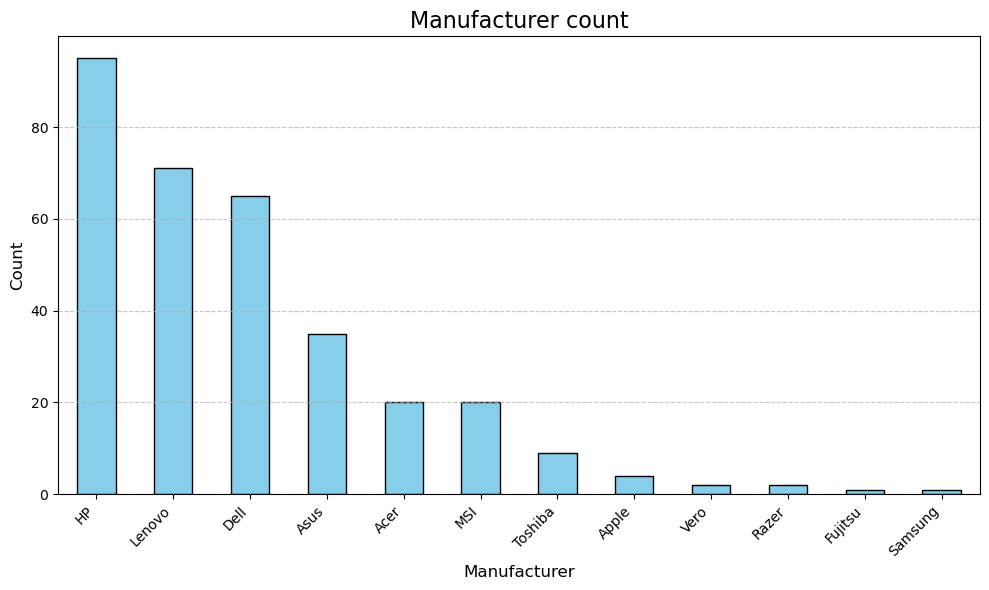

In [195]:
manufacturer_counts = df['Manufacturer'].value_counts()

plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Manufacturer count', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

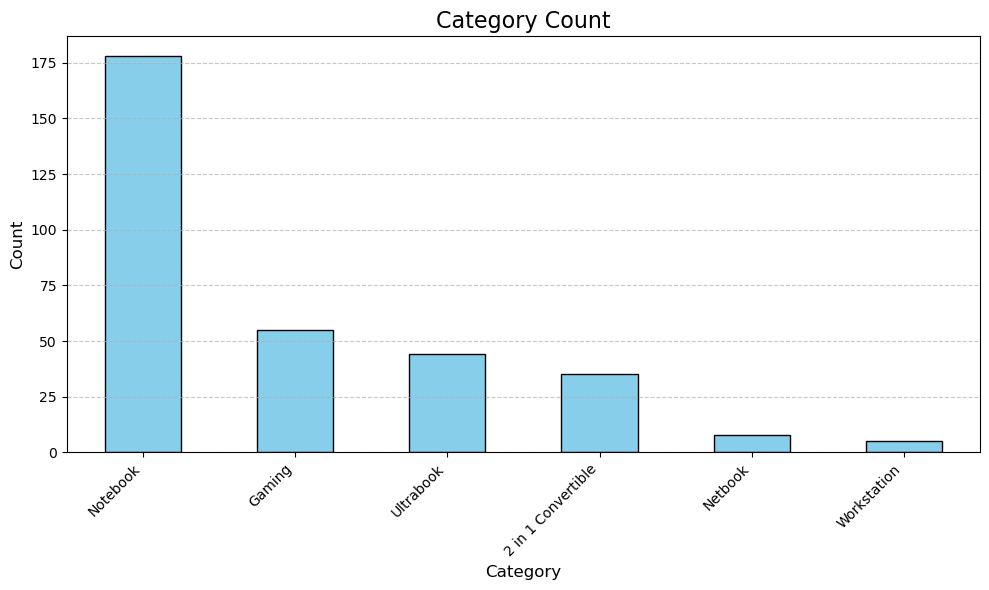

In [196]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category Count', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

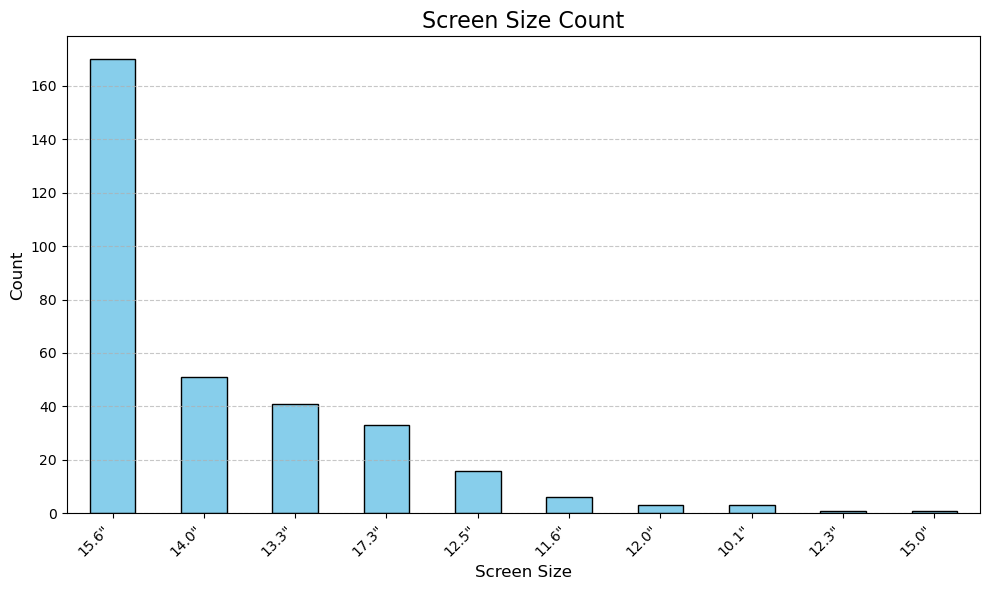

In [197]:
screen_size_counts = df['Screen Size'].value_counts()

plt.figure(figsize=(10, 6))
screen_size_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Screen Size Count', fontsize=16)
plt.xlabel('Screen Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

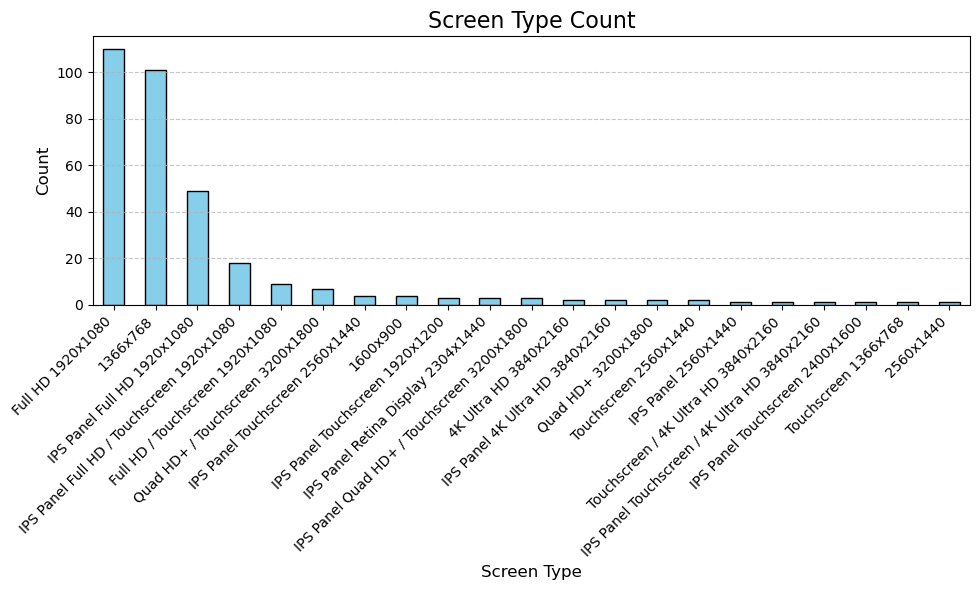

In [198]:
screen_counts = df['Screen'].value_counts()

plt.figure(figsize=(10, 6))
screen_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Screen Type Count', fontsize=16)
plt.xlabel('Screen Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


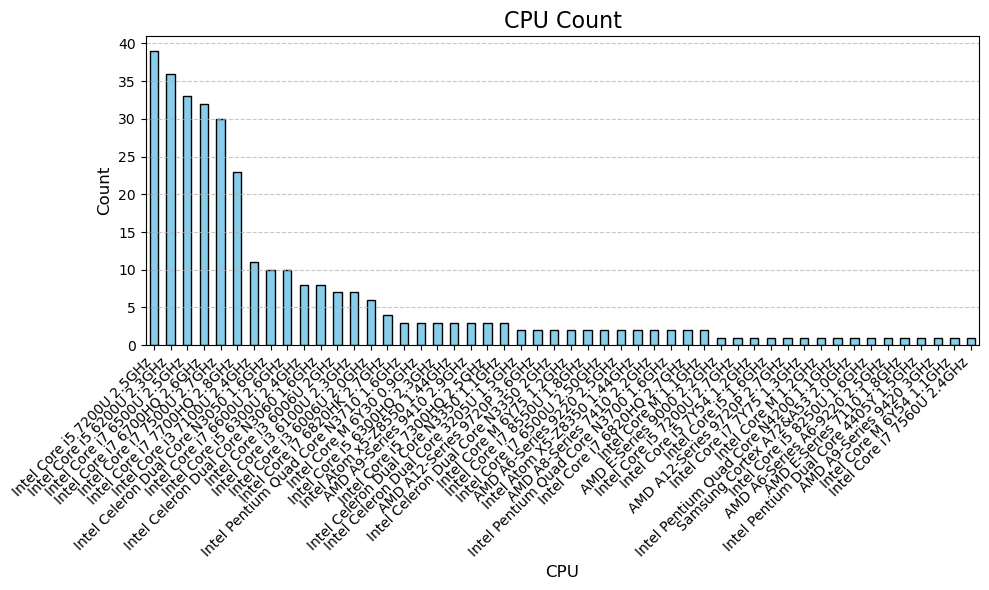

In [199]:
cpu_counts = df['CPU'].value_counts()

plt.figure(figsize=(10, 6))
cpu_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('CPU Count', fontsize=16)
plt.xlabel('CPU', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

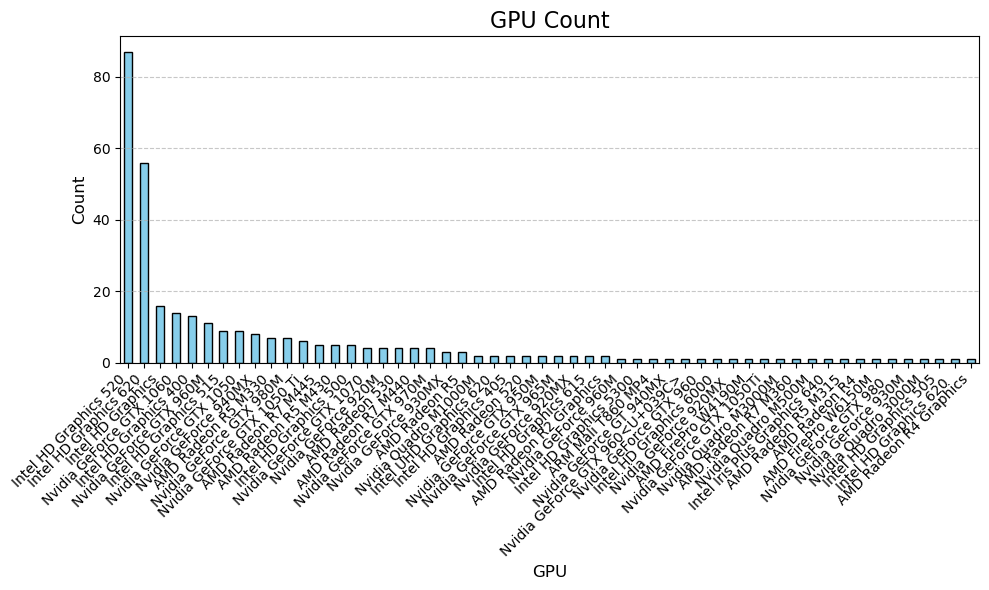

In [200]:
gpu_counts = df['GPU'].value_counts()

plt.figure(figsize=(10, 6))
gpu_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('GPU Count', fontsize=16)
plt.xlabel('GPU', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


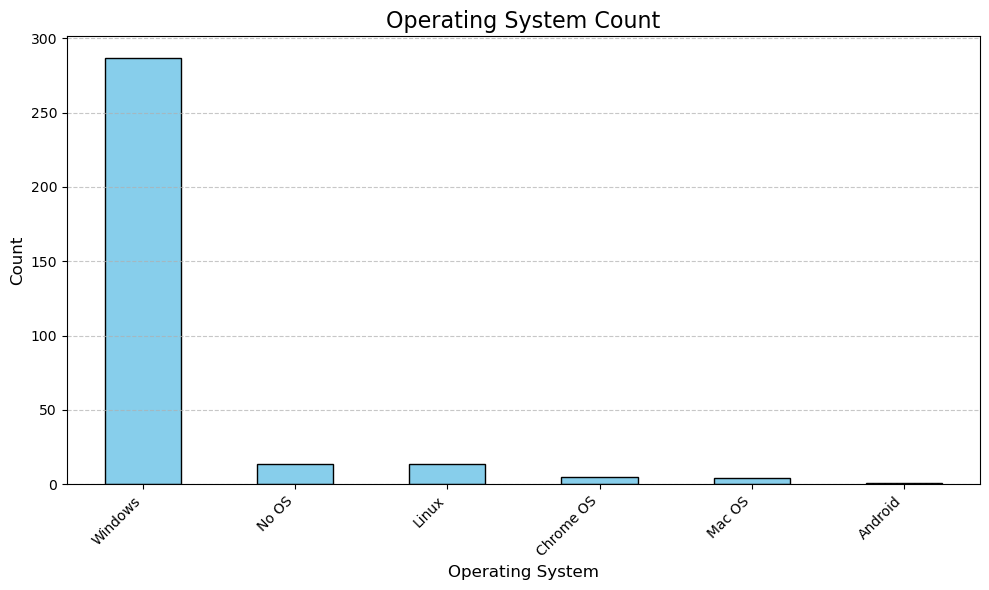

In [201]:
os_counts = df['Operating System'].value_counts()

plt.figure(figsize=(10, 6))
os_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Operating System Count', fontsize=16)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

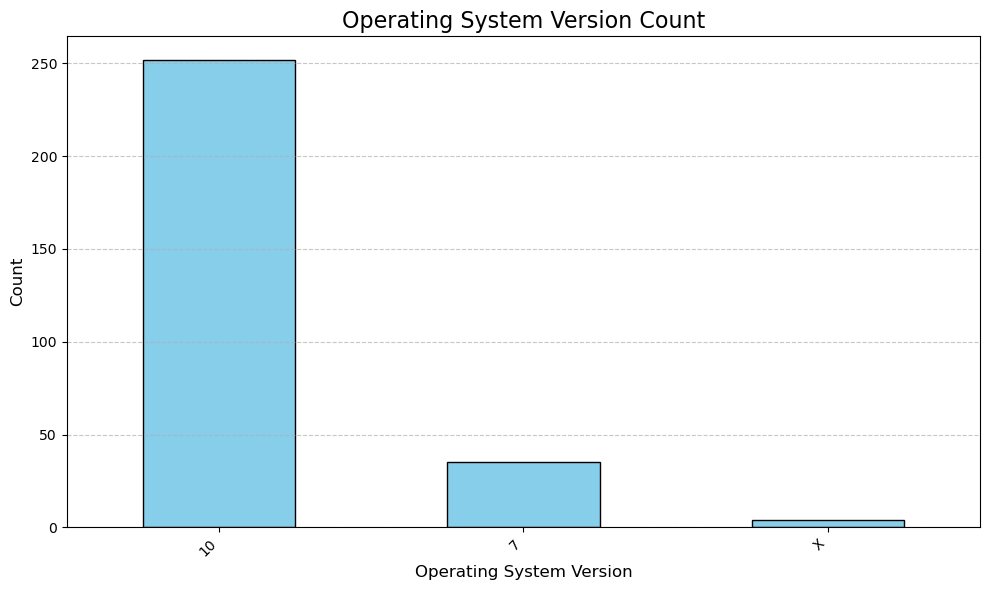

In [202]:
os_version_counts = df['Operating System Version'].value_counts()

plt.figure(figsize=(10, 6))
os_version_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Operating System Version Count', fontsize=16)
plt.xlabel('Operating System Version', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


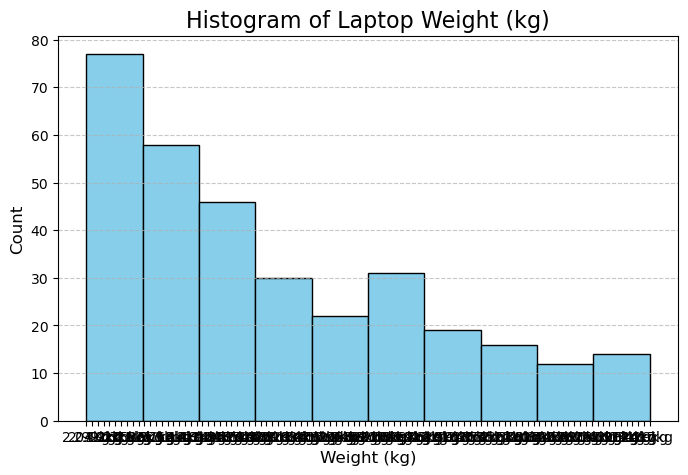

In [203]:
plt.figure(figsize=(8, 5))
plt.hist(df['Weight'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Laptop Weight (kg)', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


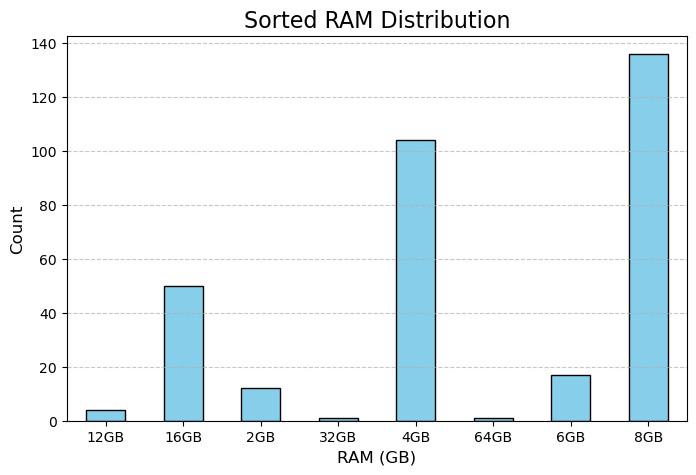

In [204]:
ram_counts = df['RAM'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ram_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sorted RAM Distribution', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


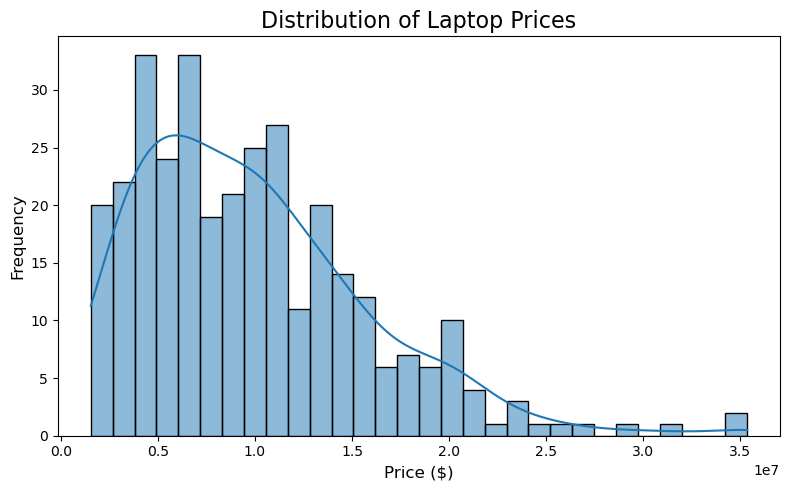

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust size as needed

# Plot the histogram with KDE (Kernel Density Estimate)
sns.histplot(df['Price'].dropna(), kde=True, bins=30, edgecolor='black', ax=ax)

# Labels and title
ax.set_xlabel('Price ($)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Laptop Prices', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


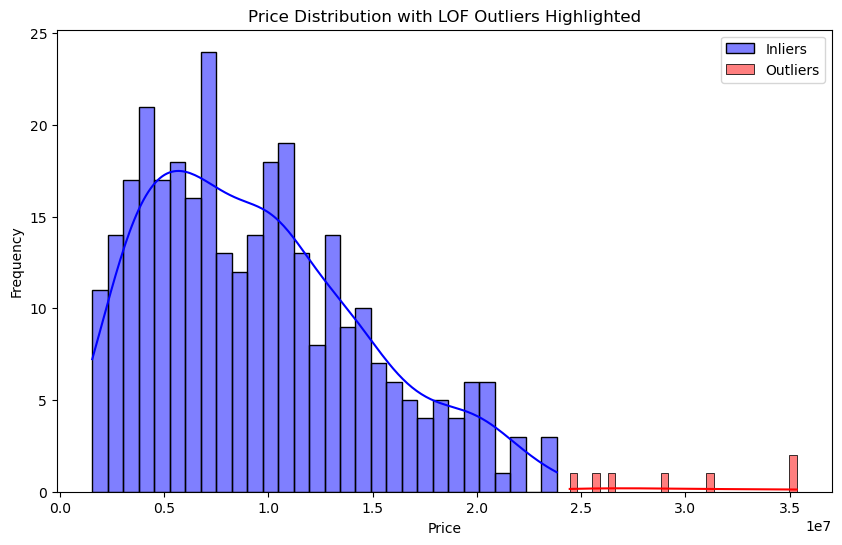

Number of outliers detected: 7
             Model Name Screen Size                           Screen  \
39         ThinkPad P70       17.3"  IPS Panel 4K Ultra HD 3840x2160   
88           ROG G701VO       17.3"      IPS Panel Full HD 1920x1080   
103  IdeaPad Y900-17ISK       17.3"      IPS Panel Full HD 1920x1080   
125            ZBook 17       17.3"      IPS Panel Full HD 1920x1080   
138  IdeaPad Y900-17ISK       17.3"      IPS Panel Full HD 1920x1080   
158            ZBook 17       17.3"      IPS Panel Full HD 1920x1080   
253           Blade Pro       14.0"                Full HD 1920x1080   

                             CPU   RAM                  Storage  \
39   Intel Core i7 6820HQ 2.7GHz  16GB                512GB SSD   
88   Intel Core i7 6820HK 2.7GHz  64GB                  1TB SSD   
103  Intel Core i7 6820HK 2.7GHz  32GB  512GB SSD +  1TB Hybrid   
125  Intel Core i7 6700HQ 2.6GHz   8GB                  1TB HDD   
138  Intel Core i7 6820HK 2.7GHz  16GB  256GB SSD +  1TB 

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# Applying LOF to "Price" feature
X_feature = df2[['Price']]

# Contamination rate of 2% (adjust if needed)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
outlier_flags = lof.fit_predict(X_feature)

# Store results
df2['Outlier_Flag'] = outlier_flags

# Visualize Price distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(df2[df2['Outlier_Flag'] == 1]['Price'], bins=30, kde=True, color='blue', edgecolor='black', label='Inliers')
sns.histplot(df2[df2['Outlier_Flag'] == -1]['Price'], bins=30, kde=True, color='red', edgecolor='black', label='Outliers')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution with LOF Outliers Highlighted')
plt.legend()
plt.show()

# Display detected outliers
outliers_detected = df2[df2['Outlier_Flag'] == -1]
print(f"Number of outliers detected: {len(outliers_detected)}")
print(outliers_detected)


## Feature aggregation

In [207]:
import pandas as pd


manufacturer_cols = [col for col in df2.columns if col.startswith('Manufacturer_')]
if manufacturer_cols:
    df2['Manufacturer'] = df2[manufacturer_cols].idxmax(axis=1).str.replace('Manufacturer_', '')
else:
    print("No manufacturer one-hot encoded columns found. Please check your column names.")

df2['Weight_kg'] = pd.to_numeric(df2['Weight'].str.extract(r'([\d\.]+)', expand=False), errors='coerce')
df2 = df2.dropna(subset=['Weight_kg'])
df2['Price_per_kg'] = df2['Price'] / df2['Weight_kg']
df2['Avg_Brand_Price'] = df2.groupby('Manufacturer')['Price'].transform('mean')
df2['Avg_Brand_Weight'] = df2.groupby('Manufacturer')['Weight_kg'].transform('mean')
df2['Avg_Brand_Price_per_kg'] = df2.groupby('Manufacturer')['Price_per_kg'].transform('mean')

brand_summary = df2.groupby('Manufacturer').agg(
    Avg_Price=('Price', 'mean'),
    Avg_Weight=('Weight_kg', 'mean'),
    Avg_Price_per_kg=('Price_per_kg', 'mean')
).reset_index()

print("DataFrame with new features:")
print(df2.head())

print("\nAggregated summary per brand:")
print(brand_summary)

DataFrame with new features:
                          Model Name Screen Size  \
0  15-bs053od (i7-7500U/6GB/1TB/W10)       15.6"   
1                   Rog GL753VE-DS74       17.3"   
2                      Inspiron 7579       15.6"   
3                  Portege Z30-C-1CV       13.3"   
4                  IdeaPad 320-15ABR       15.6"   

                                      Screen                          CPU  \
0                                   1366x768   Intel Core i7 7500U 2.7GHz   
1                          Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   
2  IPS Panel Full HD / Touchscreen 1920x1080   Intel Core i7 7500U 2.7GHz   
3                          Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   
4                          Full HD 1920x1080  AMD A12-Series 9720P 3.6GHz   

    RAM               Storage                         GPU  \
0   6GB               1TB HDD       Intel HD Graphics 620   
1  16GB  256GB SSD +  1TB HDD  Nvidia GeForce GTX 1050 Ti   
2  12GB     

## Part 2

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [210]:
path = kagglehub.dataset_download("ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training")
ds = pd.read_csv(f"{path}/dirty_cafe_sales.csv")

In [211]:
missing_values = ds.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values >= 0])


Missing values in each column:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [212]:
ds = ds.dropna()

In [213]:
import pandas as pd
import numpy as np


# Convert numeric columns to proper numeric types
# If conversion fails (e.g., non-numeric entries like "ERROR"), they become NaN
numeric_columns = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numeric_columns:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')

# Define plausible ranges for the numeric columns
# Adjust these ranges as needed for your context.
ranges = {
    'Quantity': (1, 100),          # Assuming a quantity should be between 1 and 100.
    'Price Per Unit': (0.1, 1000),   # Prices in a realistic range.
    'Total Spent': (0.1, 1e6)        # Total spent should be positive and within a sensible upper bound.
}

# Check for out-of-range values in numeric columns
for column, (min_val, max_val) in ranges.items():
    out_of_range = ~ds[column].between(min_val, max_val)
    if out_of_range.any():
        print(f"Out-of-range values detected in '{column}':")
        print(ds.loc[out_of_range, ['Transaction ID', column]])
        # Handle out-of-range values (e.g., setting them to NaN)
        ds.loc[out_of_range, column] = np.nan
    else:
        print(f"No out-of-range values detected in '{column}'.")

# Validate categorical columns by checking if they are in the list of allowed values
valid_payment_methods = ["Credit Card", "Cash", "Digital Wallet"]
valid_locations = ["Takeaway", "In-store"]

# Payment Method check
invalid_payment = ~ds['Payment Method'].isin(valid_payment_methods)
if invalid_payment.any():
    print("Invalid Payment Method values:")
    print(ds.loc[invalid_payment, ['Transaction ID', 'Payment Method']])
    ds.loc[invalid_payment, 'Payment Method'] = np.nan
else:
    print("All Payment Methods are valid.")

# Location check
invalid_location = ~ds['Location'].isin(valid_locations)
if invalid_location.any():
    print("Invalid Location values:")
    print(ds.loc[invalid_location, ['Transaction ID', 'Location']])
    ds.loc[invalid_location, 'Location'] = np.nan
else:
    print("All Locations are valid.")

# Validate Transaction Date by converting the column to datetime
ds['Transaction Date'] = pd.to_datetime(ds['Transaction Date'], errors='coerce')
invalid_dates = ds['Transaction Date'].isna()
if invalid_dates.any():
    print("Invalid Transaction Date values:")
    print(ds.loc[invalid_dates, ['Transaction ID', 'Transaction Date']])
else:
    print("All Transaction Dates are valid.")

# (Optional) Check if Total Spent equals Quantity * Price Per Unit where possible
# This helps ensure internal consistency.
calculated_total = ds['Quantity'] * ds['Price Per Unit']
mismatched = ~np.isclose(ds['Total Spent'], calculated_total, equal_nan=True)
if mismatched.any():
    print("Rows where Total Spent does not equal Quantity * Price Per Unit:")
    print(ds.loc[mismatched, ['Transaction ID', 'Quantity', 'Price Per Unit', 'Total Spent']])
    # Optionally, you could update Total Spent as:
    # ds.loc[mismatched, 'Total Spent'] = calculated_total[mismatched]
else:
    print("All Total Spent values are consistent with Quantity * Price Per Unit.")


Out-of-range values detected in 'Quantity':
     Transaction ID  Quantity
20      TXN_3522028       NaN
55      TXN_5522862       NaN
57      TXN_2080895       NaN
117     TXN_2148617       NaN
153     TXN_6541415       NaN
...             ...       ...
9750    TXN_5604021       NaN
9832    TXN_3325234       NaN
9944    TXN_7495283       NaN
9957    TXN_6487003       NaN
9984    TXN_3142496       NaN

[146 rows x 2 columns]
Out-of-range values detected in 'Price Per Unit':
     Transaction ID  Price Per Unit
147     TXN_9336980             NaN
161     TXN_7965998             NaN
162     TXN_9238666             NaN
196     TXN_3800182             NaN
228     TXN_9350833             NaN
...             ...             ...
9550    TXN_9093708             NaN
9742    TXN_8077812             NaN
9753    TXN_3507013             NaN
9796    TXN_8191202             NaN
9926    TXN_2464706             NaN

[168 rows x 2 columns]
Out-of-range values detected in 'Total Spent':
     Transaction ID

In [214]:
import pandas as pd
import numpy as np



# Convert numeric columns to proper numeric types.
# Non-numeric entries (like "ERROR") become NaN.
numeric_columns = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numeric_columns:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')

# Convert Transaction Date to datetime. Invalid dates become NaT.
ds['Transaction Date'] = pd.to_datetime(ds['Transaction Date'], errors='coerce')

# Define plausible ranges for numeric columns
ranges = {
    'Quantity': (1, 100),          # e.g., quantity should be between 1 and 100.
    'Price Per Unit': (0.1, 1000),   # realistic price range.
    'Total Spent': (0.1, 1e6)        # sensible total spent range.
}

# Build a boolean mask for valid numeric values
valid_numeric = pd.Series(True, index=ds.index)
for col, (min_val, max_val) in ranges.items():
    valid_numeric &= ds[col].notna() & ds[col].between(min_val, max_val)

# Define valid values for categorical columns
valid_payment_methods = ["Credit Card", "Cash", "Digital Wallet"]
valid_locations = ["Takeaway", "In-store"]

valid_payment = ds['Payment Method'].isin(valid_payment_methods)
valid_location = ds['Location'].isin(valid_locations)

# Validate that the Transaction Date is a valid datetime
valid_date = ds['Transaction Date'].notna()

# Optional: Consistency check where Total Spent should equal Quantity * Price Per Unit.
calculated_total = ds['Quantity'] * ds['Price Per Unit']
valid_total_consistency = np.isclose(ds['Total Spent'], calculated_total, equal_nan=False)

# Combine all the conditions. Only rows meeting all conditions are kept.
all_valid = valid_numeric & valid_payment & valid_location & valid_date & valid_total_consistency

# Remove (drop) rows that are out-of-range or invalid
ds_valid = ds[all_valid].copy()

print("Number of rows removed:", len(ds) - len(ds_valid))
print("Remaining valid rows:")
print(ds_valid)


Number of rows removed: 1242
Remaining valid rows:
     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
4       TXN_3160411    Coffee       2.0             2.0          4.0   
10      TXN_2548360     Salad       5.0             5.0         25.0   
12      TXN_7619095  Sandwich       2.0             4.0          8.0   
...             ...       ...       ...             ...          ...   
9975    TXN_9668108      Cake       1.0             3.0          3.0   
9979    TXN_9933628  Smoothie       5.0             4.0         20.0   
9986    TXN_2858441  Sandwich       2.0             4.0          8.0   
9991    TXN_3897619  Sandwich       3.0             4.0         12.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway    

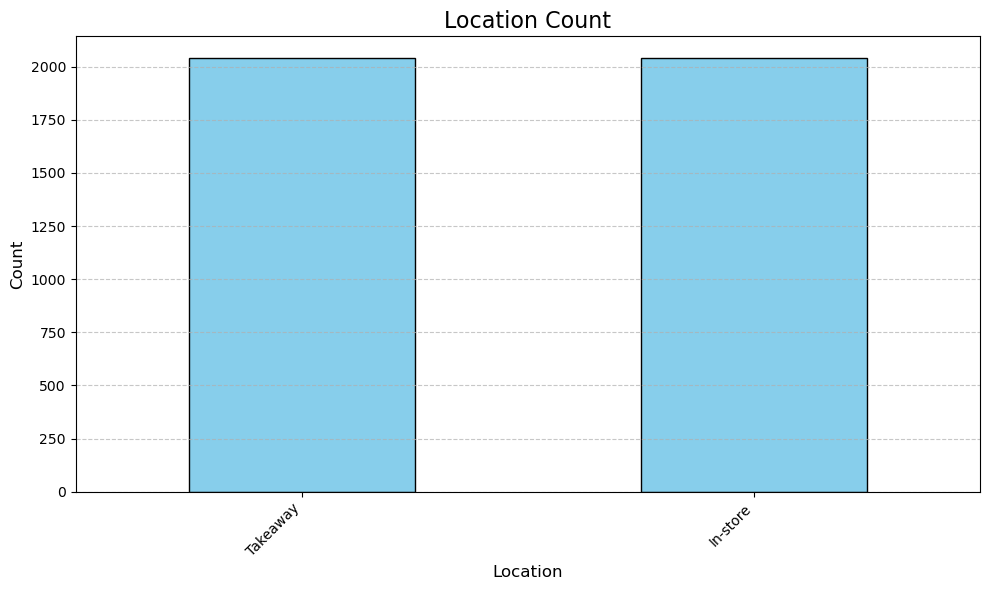

In [215]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the counts for each unique value in the 'Location' column
location_counts = ds['Location'].value_counts()

# Plot the location counts as a bar chart
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Location Count', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


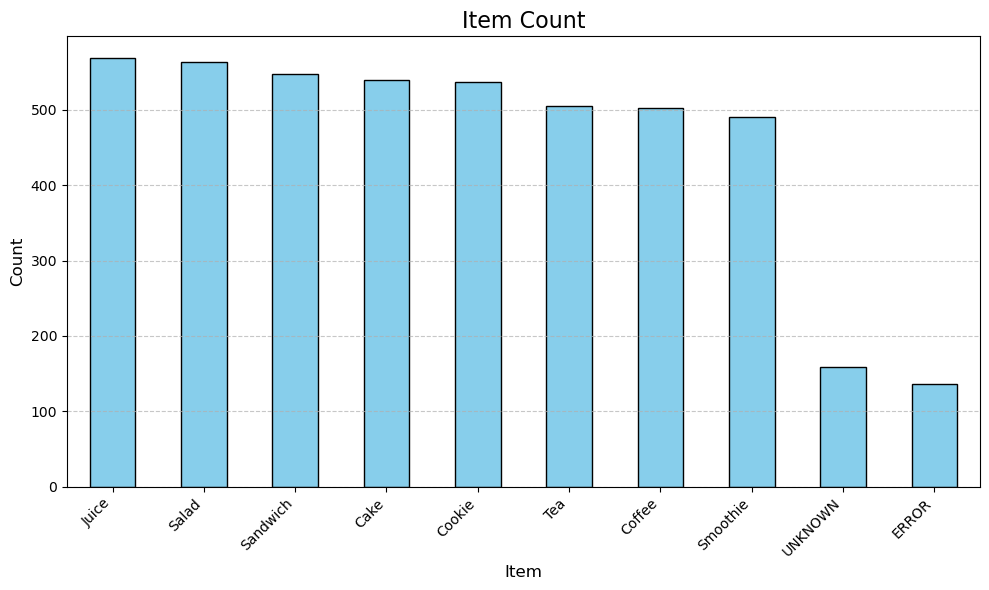

In [216]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the counts for each unique value in the 'Item' column
item_counts = ds['Item'].value_counts()

# Plot the item counts as a bar chart
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Item Count', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


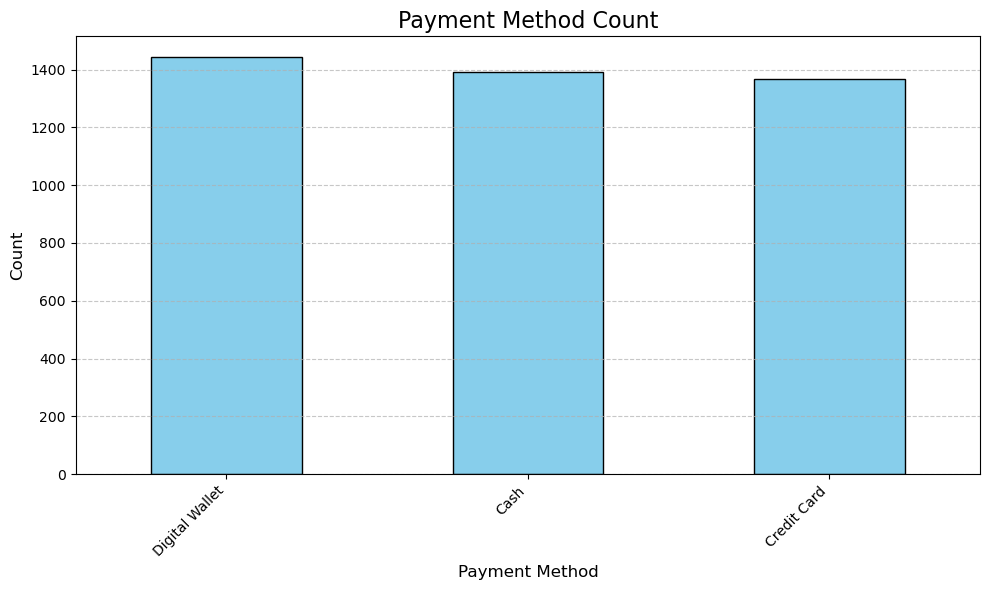

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the counts for each unique value in the 'Payment Method' column
payment_counts = ds['Payment Method'].value_counts()

# Plot the payment method counts as a bar chart
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Payment Method Count', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


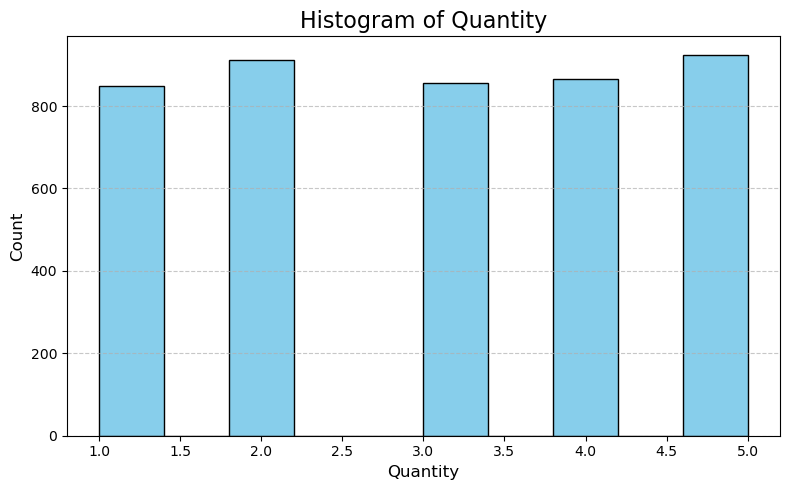

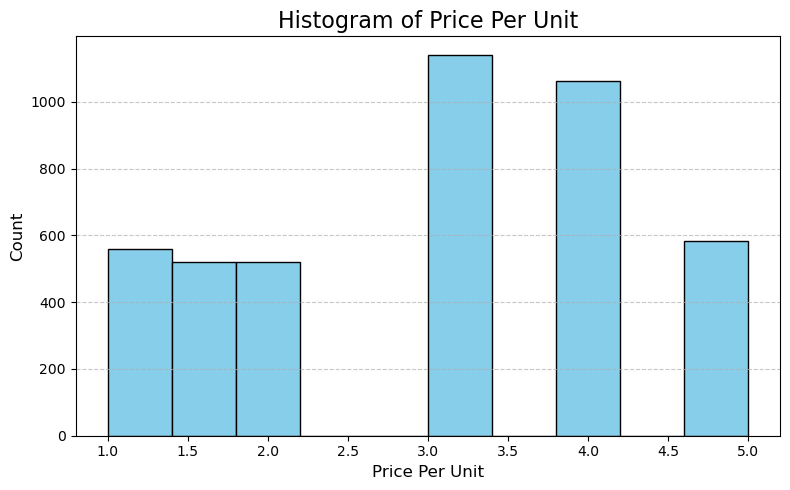

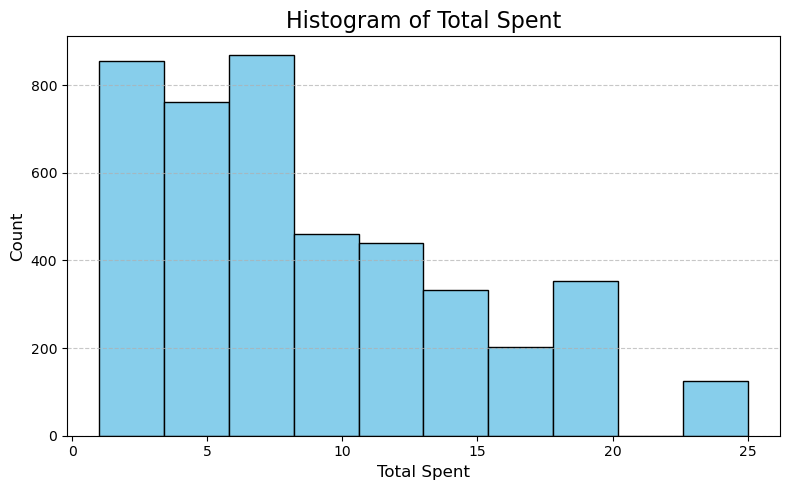

In [218]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert numeric columns to proper numeric types.
# Non-numeric entries (like "ERROR") become NaN.
numeric_columns = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numeric_columns:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')

# Plot histogram for each numeric attribute
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(ds[col].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


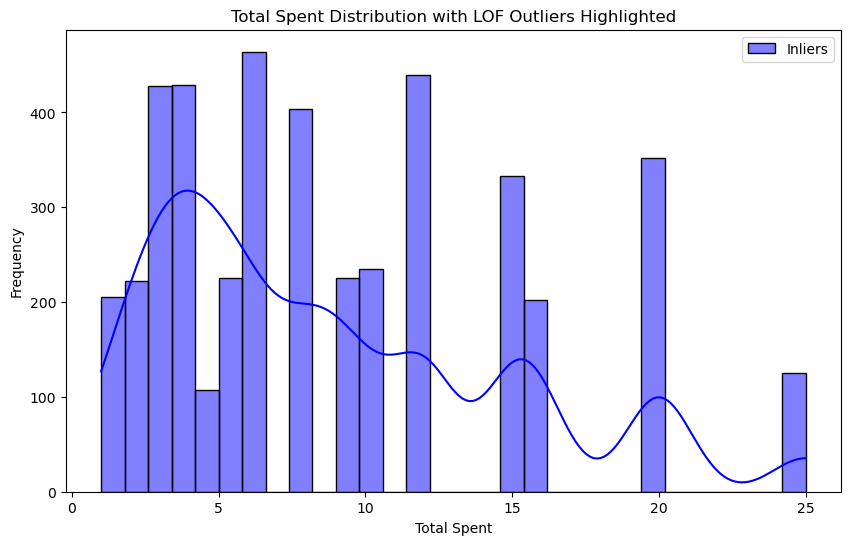

Number of outliers detected: 0
Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date, Outlier_Flag]
Index: []


In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor


# Convert 'Total Spent' to numeric (non-numeric entries like "ERROR" become NaN)
ds['Total Spent'] = pd.to_numeric(ds['Total Spent'], errors='coerce')

# Drop rows with NaN in 'Total Spent' (LOF requires numeric values)
ds = ds.dropna(subset=['Total Spent'])

# Prepare the feature for LOF
X_feature = ds[['Total Spent']]

# Set up the LOF model with a contamination rate of 2% (adjust if needed)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)

# Apply LOF to flag outliers (-1 indicates an outlier, 1 an inlier)
outlier_flags = lof.fit_predict(X_feature)

# Store the LOF result in a new column
ds['Outlier_Flag'] = outlier_flags

# Visualize the 'Total Spent' distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(ds[ds['Outlier_Flag'] == 1]['Total Spent'], bins=30, kde=True, color='blue', edgecolor='black', label='Inliers')
sns.histplot(ds[ds['Outlier_Flag'] == -1]['Total Spent'], bins=30, kde=True, color='red', edgecolor='black', label='Outliers')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Total Spent Distribution with LOF Outliers Highlighted')
plt.legend()
plt.show()

# Display the detected outliers
outliers_detected = ds[ds['Outlier_Flag'] == -1]
print(f"Number of outliers detected: {len(outliers_detected)}")
print(outliers_detected)


## Feature aggregation

In [262]:
ds['Quantity'] = pd.to_numeric(ds['Quantity'], errors='coerce')
ds['Price Per Unit'] = pd.to_numeric(ds['Price Per Unit'], errors='coerce')
ds['Total Spent'] = pd.to_numeric(ds['Total Spent'], errors='coerce')

ds['Unit_Spent_Ratio'] = ds['Total Spent'] / (ds['Quantity'] * ds['Price Per Unit'])
ds['Avg_Payment_TotalSpent'] = ds.groupby('Payment Method')['Total Spent'].transform('mean')

payment_summary = ds.groupby('Payment Method').agg(Avg_Total_Spent=('Total Spent', 'mean')).reset_index()

print(ds.head())
print(payment_summary)

  Transaction ID     Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373   Coffee       2.0             2.0          4.0   
1    TXN_4977031     Cake       4.0             3.0         12.0   
3    TXN_7034554    Salad       2.0             5.0         10.0   
4    TXN_3160411   Coffee       2.0             2.0          4.0   
6    TXN_4433211  UNKNOWN       3.0             3.0          9.0   

   Payment Method  Location Transaction Date  Outlier_Flag  Unit_Spent_Ratio  \
0     Credit Card  Takeaway       2023-09-08             1               1.0   
1            Cash  In-store       2023-05-16             1               1.0   
3             NaN       NaN       2023-04-27             1               1.0   
4  Digital Wallet  In-store       2023-06-11             1               1.0   
6             NaN  Takeaway       2023-10-06             1               1.0   

   Avg_Payment_TotalSpent  
0                8.881114  
1                9.007446  
3                     NaN 

## Reference 

https://www.geeksforgeeks.org/ml-linear-regression/
https://www.geeksforgeeks.org/decision-tree/
How to make a countplot using matplotlib 
https://chatgpt.com/c/67d33998-2460-8002-a2f8-5fe959be5ad1 

### Conclusion  

In this notebook, we explored predictive modeling techniques for both regression and classification tasks using two datasets: the Laptop Price Prediction Dataset and the Dirty Cafe Sales Dataset.  

For the regression task, we analyzed how various laptop specifications, such as brand, processor type, RAM, and storage, influence laptop prices. We applied linear regression to build a predictive model and evaluated different approaches, including outlier removal and feature engineering, to improve accuracy. The results provided insights into which laptop features have the most significant impact on price.  

For the classification task, we worked with a noisy, real-world sales dataset from a cafe. We applied data cleaning techniques to handle missing values and inconsistencies before building a decision tree classifier. Through model evaluation and hyperparameter tuning, we identified the most effective features for predicting a categorical outcome.  

This assignment reinforced the importance of data preprocessing, feature engineering, and model evaluation in predictive analysis. While the models provided useful insights, further improvements could be made by experimenting with more advanced techniques, such as regularization for regression and ensemble methods for classification. Future work could also include additional feature selection techniques and the use of deep learning models for more complex relationships in the data.